In [2]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import pandas as pd
plt.style.use('fivethirtyeight')

In [38]:
a_cur_amt,b_cur_amt,c_cur_amt=0,0,0
a_init_amt=10**(-8)
a_cur_amt=a_init_amt  #int(input("Give initial amount of A:- "))
a_decay_rate=0.0137  #int(input("Give decay rate of A:- ")) is /da
b_decay_rate=0.0051 #int(input("Give decay rate of B:- ")) /da.

In [39]:
time_step=0.25 #one time step of 0.25 seconds as we consider time moving in small incremental discrete time steps
cur_time=0
upper_lim=1200
time_stamps=np.arange(0,upper_lim,time_step) # start, stop , step
dict={'Time_in_sec':time_stamps,'Amt_of_A':time_stamps,'Amt_of_B':time_stamps,'Amt_of_C':time_stamps}
df=pd.DataFrame(dict)
index=0
while(cur_time<upper_lim):
    df.loc[index]['Amt_of_A']=a_cur_amt 
    df.loc[index]['Amt_of_B']=b_cur_amt
    df.loc[index]['Amt_of_C']=c_cur_amt
    a_future_amt=a_cur_amt-time_step*(a_decay_rate*a_cur_amt)
    b_future_amt=b_cur_amt+time_step*((a_decay_rate*a_cur_amt)-(b_decay_rate*b_cur_amt))
    c_future_amt=c_cur_amt+time_step*(b_decay_rate*b_cur_amt)
    a_cur_amt=a_future_amt if(a_future_amt>=0) else 0
    b_cur_amt=b_future_amt if(b_future_amt>=0) else 0
    c_cur_amt=c_future_amt if(c_future_amt>=0) else 0
    index+=1
    cur_time+=time_step
df

,Time_in_sec,Amt_of_A,Amt_of_B,Amt_of_C
0,0.00,1.000000e-08,0.000000e+00,0.000000e+00
1,0.25,9.965750e-09,3.425000e-11,0.000000e+00
2,0.50,9.931617e-09,6.833903e-11,4.366875e-14
3,0.75,9.897602e-09,1.022677e-10,1.308010e-13
4,1.00,9.863702e-09,1.360366e-10,2.611923e-13
...,...,...,...,...
4795,1198.75,7.167932e-16,3.510753e-11,9.964892e-09
4796,1199.00,7.143382e-16,3.506277e-11,9.964937e-09
4797,1199.25,7.118916e-16,3.501807e-11,9.964981e-09
4798,1199.50,7.094533e-16,3.497343e-11,9.965026e-09


Max amount of B by running simulation  5.571090858161768e-09
Time at which max B occurs=  114.75


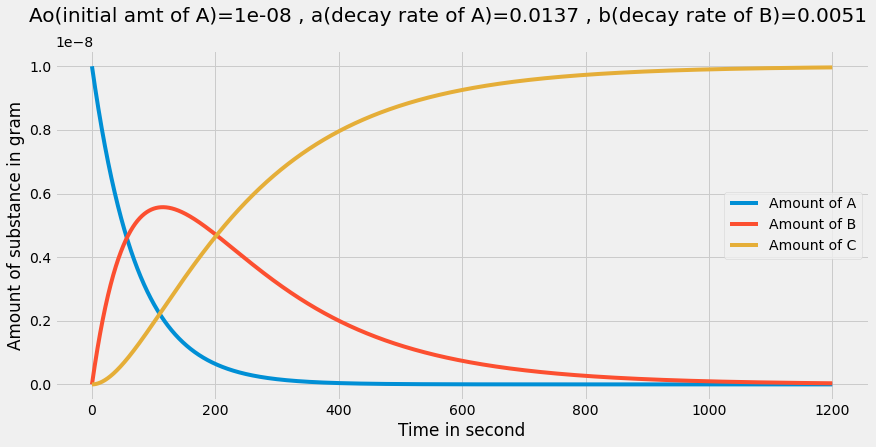

In [40]:
plt.figure(figsize=(13,6))
text='Ao(initial amt of A)={} , a(decay rate of A)={} , b(decay rate of B)={}'
text=text.format(a_init_amt,a_decay_rate,b_decay_rate)
plt.suptitle(text,fontsize=20)
plt.xlabel('Time in second')
plt.ylabel('Amount of substance in gram')
plt.plot(time_stamps,df['Amt_of_A'],label='Amount of A')
plt.plot(time_stamps,df['Amt_of_B'],label='Amount of B')
plt.plot(time_stamps,df['Amt_of_C'],label='Amount of C')
plt.legend()
print("Max amount of B by running simulation ",max(df['Amt_of_B']))
print("Time at which max B occurs= ",time_stamps[np.argmax(df['Amt_of_B'])])

In [26]:
df['Amt_of_B'].tolist()

[0.0,
 5.25,
 3.9375,
 2.296875,
 1.23046875,
 0.6357421875,
 0.322998046875,
 0.16278076171875,
 0.0817108154296875,
 0.040935516357421875,
 0.02048778533935547,
 0.010248899459838867,
 0.005125701427459717,
 0.002563163638114929,
 0.0012816600501537323,
 0.0006408495828509331,
 0.00032042968086898327,
 0.00016021606279537082,
 8.01083369879052e-05,
 4.005424489150755e-05,
 2.0027141545142513e-05,
 1.001357554741844e-05,
 5.006788967421016e-06,
 2.5033947821384572e-06,
 1.2516974656762159e-06,
 6.258487514898547e-07,
 3.129243804078641e-07,
 1.5646219136966621e-07,
 7.823109597626665e-08,
 3.911554806099171e-08,
 1.9557774048710452e-08,
 9.778887028908875e-09,
 4.88944351559285e-09,
 2.444721758081028e-09,
 1.2223608791116648e-09,
 6.111804395736201e-10,
 3.0559021979125696e-10,
 1.5279510989674021e-10,
 7.639755494864804e-11,
 3.81987774743935e-11]